<a href="https://colab.research.google.com/github/vinymendes/GQS/blob/main/Trabalho_de_Computa%C3%A7%C3%A3o_Gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemente modificações visuais em uma imagem: realização de translação, rotação, escalonamento e transformações compostas com base em dados de entrada. Faça com que o usuário possa escolher o que ele deseja realizar.



Integrantes do grupo:

- Pedro Henrique de Araújo Ribeiro
- Dimitri Santana Marinho
- João Victor Moura Brandão
- Bruno Magalhães Cardoso
- Marcus Vinicius Mendes Carneiro Ribeiro
- Guilherme de Meneses Mota

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import Image, display
from matplotlib import pyplot as plt
from google.colab import files
import numpy as np
import shutil
import cv2
import os

In [ ]:
def upload_image():
    # Faz o upload da imagem
    uploaded = files.upload()

    # Obtém o nome do arquivo carregado
    file_name = list(uploaded.keys())[0]

    # Mostra a imagem carregada
    display(Image(filename=file_name))

    # Retorna o nome do arquivo para ser usado posteriormente, se necessário
    return file_name

In [ ]:
def salvar_imagem_google_colab(image_name, imagem_para_salvar):
    # Especifica o caminho da nova pasta
    caminho_nova_pasta = '/content/trabalho_computacao_grafica'

    # Verifica se a pasta já existe; se não existir, cria
    if not os.path.exists(caminho_nova_pasta):
        os.makedirs(caminho_nova_pasta)
        # print(f"A pasta {caminho_nova_pasta} foi criada com sucesso.")
    # else:
      # print(f"A pasta {caminho_nova_pasta} já existe.")

    nome_da_imagem = image_name + ".jpg"
    path = f'/content/trabalho_computacao_grafica/{nome_da_imagem}'

    # Verifica se a imagem já existe no caminho especificado
    if os.path.exists(path):
        # Se existir, exclui o arquivo existente
        os.remove(path)
        # print(f"A imagem {nome_da_imagem} existente foi removida.")

    # Salva a nova imagem no caminho especificado
    cv2.imwrite(path, imagem_para_salvar)

    return path

In [ ]:
def limpar_pasta_content():
    pasta_content = '/content'

    # Verifica se a pasta 'content' existe
    if os.path.exists(pasta_content):
        # Lista todos os arquivos e subpastas na pasta 'content'
        conteudo = os.listdir(pasta_content)

        # Itera sobre o conteúdo e remove cada item individualmente
        for item in conteudo:
            caminho_item = os.path.join(pasta_content, item)

            # Verifica se é um arquivo e o remove
            if os.path.isfile(caminho_item):
                os.remove(caminho_item)
            # Se for uma pasta, remove recursivamente
            elif os.path.isdir(caminho_item):
                shutil.rmtree(caminho_item)

        print(f'Conteúdo da pasta {pasta_content} removido com sucesso.')
    else:
        print(f'A pasta {pasta_content} não existe.')

In [ ]:
def translacao_imagem(imagem, dx, dy):
    # Lê a imagem
    img = cv2.imread(imagem)

    # Obtém as dimensões da imagem
    linhas, colunas, _ = img.shape

    # Define a matriz de transformação para a translação
    matriz_translacao = np.float32([[1, 0, dx], [0, 1, dy]])

    # Aplica a translação usando a função warpAffine do OpenCV
    img_transladada = cv2.warpAffine(img, matriz_translacao, (colunas, linhas))

    image_path = salvar_imagem_google_colab('img_transladada', img_transladada)

    return img_transladada, image_path

In [ ]:
def rotate_image(image_path, angle):
    # Carrega a imagem usando o OpenCV
    image = cv2.imread(image_path)

    # Obtém altura e largura da imagem
    height, width = image.shape[:2]

    # Calcula o ponto central da imagem
    center = (width / 2, height / 2)

    # Define a matriz de rotação
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Realiza a rotação da imagem
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    image_path = salvar_imagem_google_colab('rotated_image', rotated_image)

    return rotated_image, image_path

In [ ]:
def escalonar_imagem(imagem, escala_percentual):
    # Lendo a imagem do URL
    img = cv2.imread(imagem)

    # Obtendo as dimensões originais da imagem
    height, width = img.shape[:2]

    # Calculando as novas dimensões com base na escala_percentual
    nova_altura = int(height * escala_percentual / 100)
    nova_largura = int(width * escala_percentual / 100)

    # Redimensionando a imagem
    imagem_redimensionada = cv2.resize(img, (nova_largura, nova_altura))

    # Exibindo a imagem redimensionada
    cv2_imshow(imagem_redimensionada)

    image_path = salvar_imagem_google_colab('imagem_redimensionada', imagem_redimensionada)

    return imagem_redimensionada, image_path

Saving gkpb-banco-de-imagens-pagos.jpg to gkpb-banco-de-imagens-pagos.jpg


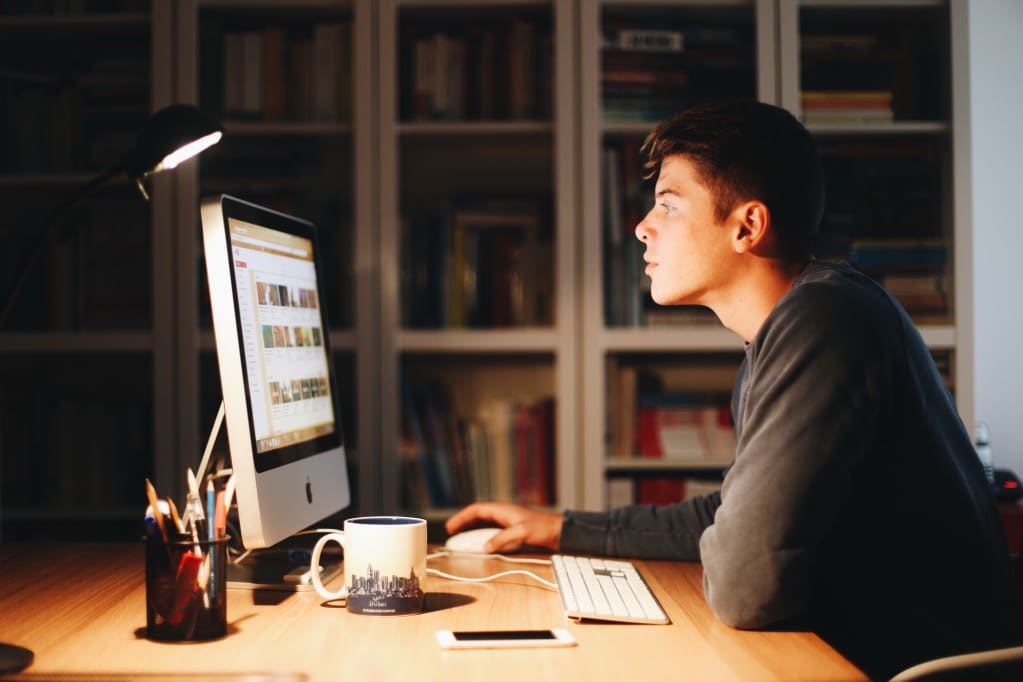

Imagem carregada: gkpb-banco-de-imagens-pagos.jpg


In [ ]:
# Uso da função upload_image()
image_path_original = upload_image()
print(f'Imagem carregada: {image_path_original}')

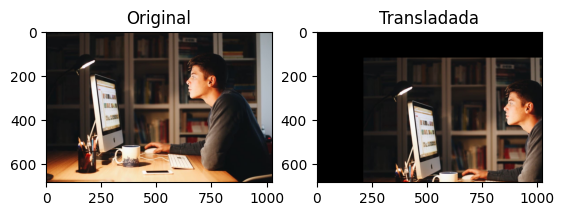

In [ ]:
# Uso da função translacao_imagem()
imagem_transladada, image_path = translacao_imagem(image_path_original, 210, 120)

# Exibe a imagem original e a imagem transladada lado a lado
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
plt.show()

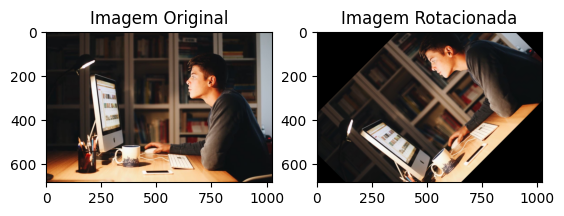

In [ ]:
# Uso da função rotate_image()
angle = 45  # Ângulo de rotação desejado

rotated_image, image_path = rotate_image(image_path_original, angle)

# Exibe a imagem original e a imagem rotacionada
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Rotacionada")

plt.show()

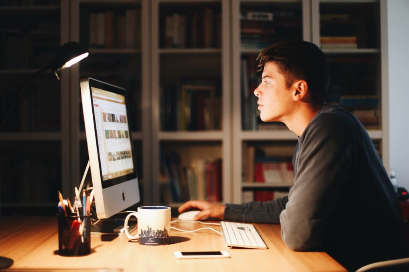

In [ ]:
# Uso da função escalonar_imagem()
escala_percentual = 40  # Altere para a escala desejada (50 significa 50% do tamanho original)

imagem_resultante, path = escalonar_imagem(image_path_original, escala_percentual)

In [ ]:
# Uso da função limpar_pasta_content()
limpar_pasta_content() # Chama a função para limpar a pasta 'content'

Conteúdo da pasta /content removido com sucesso.


Saving gkpb-banco-de-imagens-pagos.jpg to gkpb-banco-de-imagens-pagos (1).jpg


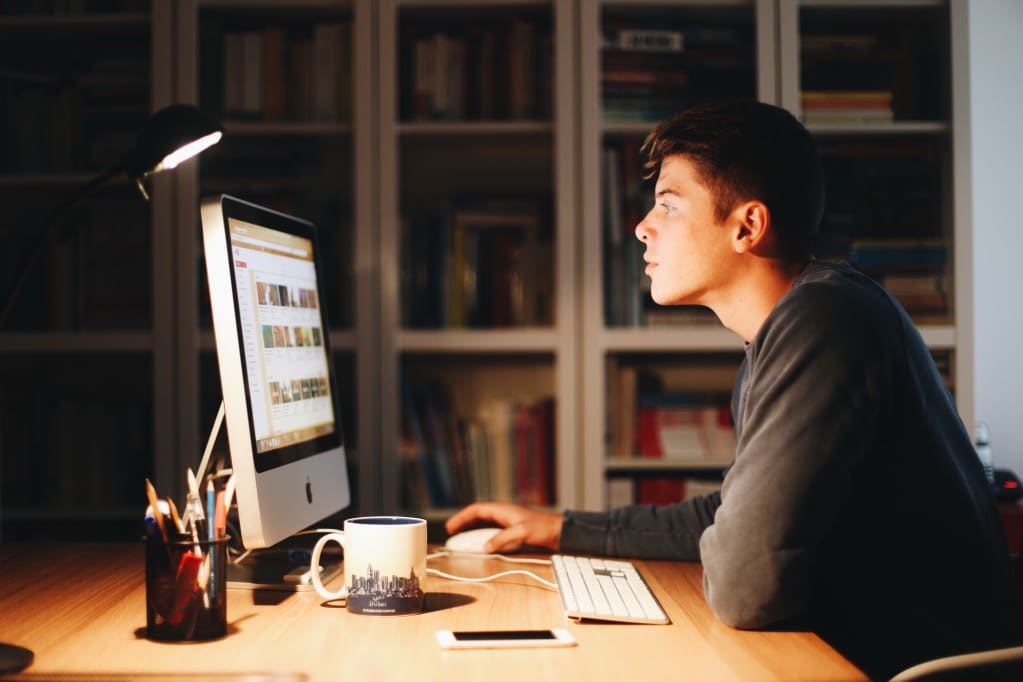

Imagem carregada: /content/trabalho_computacao_grafica/rotated_image.jpg


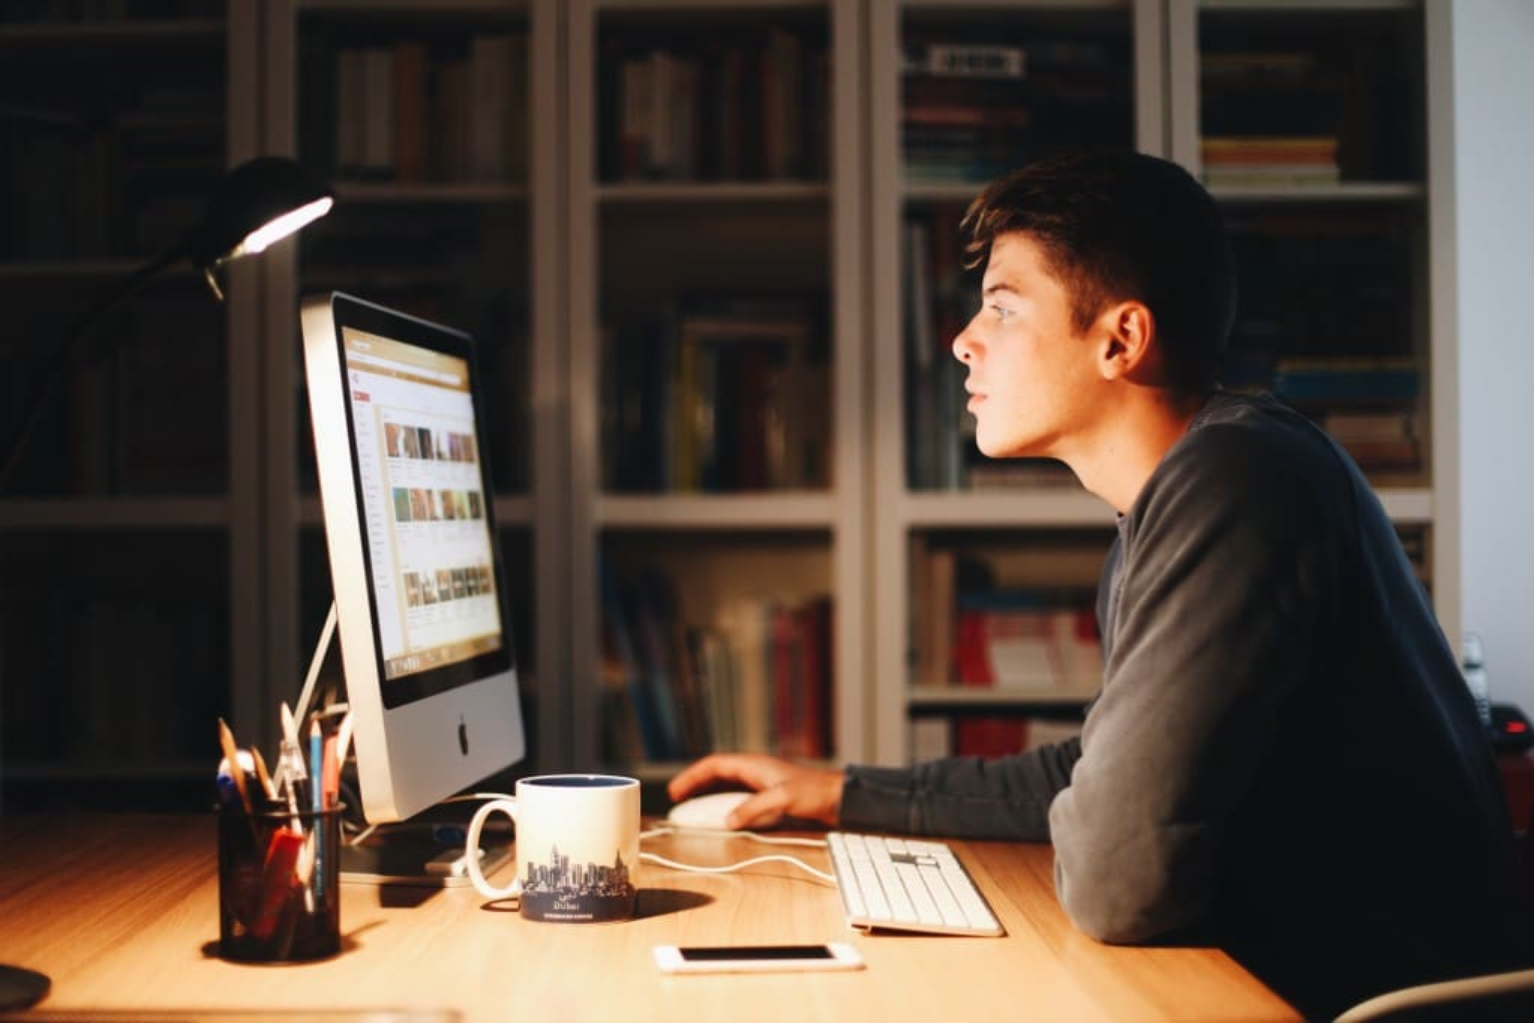

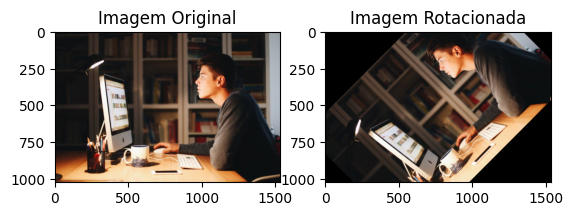

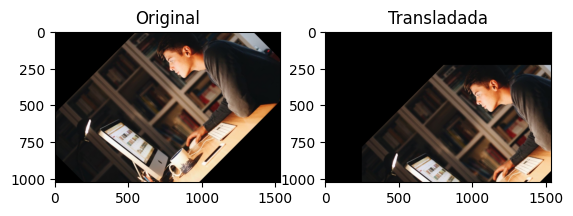

In [ ]:
# Transformações compostas com base em dados de entrada

image_path_original = upload_image()
print(f'Imagem carregada: {image_path}')

escala_percentual = 150  # Altere para a escala desejada (50 significa 50% do tamanho original)

imagem_resultante, image_path_escalonamento = escalonar_imagem(image_path_original, escala_percentual)

angle = 45  # Ângulo de rotação desejado

rotated_image, image_path_rotacao = rotate_image(image_path_escalonamento, angle)

# Exibe a imagem original e a imagem rotacionada
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path_escalonamento), cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Rotacionada")

plt.show()

imagem_transladada, image_path = translacao_imagem(image_path_rotacao, 250, 230)

# Exibe a imagem original e a imagem transladada lado a lado
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_rotacao), cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
plt.show()

No contexto de manipulação de imagens com transformações compostas com base em dados de entrada, isso se refere a permitir que o usuário especifique uma série de transformações que serão aplicadas à imagem. Essas transformações podem incluir translação (mover a imagem para cima, para baixo, para a esquerda ou para a direita), rotação, escalonamento (aumentar ou diminuir o tamanho da imagem) e outras transformações visuais.

A ideia é que o usuário forneça dados de entrada, como valores específicos para os parâmetros de translação, rotação e escalonamento. Esses dados de entrada são então utilizados para compor uma sequência de transformações que são aplicadas à imagem. A transformação resultante é o produto da aplicação sequencial dessas operações.

Por exemplo, se o usuário especificar uma translação de 20 pixels para a direita, seguida de uma rotação de 45 graus no sentido anti-horário e, finalmente, um escalonamento de 1.5x, as transformações seriam compostas nessa ordem. Cada transformação é aplicada com base no resultado da transformação anterior, resultando em uma imagem transformada de maneira complexa.

| Bem-vindo ao Programa de Manipulação de Imagens |

🌟 Antes de começarmos, precisamos que você realize o upload da imagem desejada. 🌟
Certifique-se de selecionar a imagem correta para garantir resultados precisos.


Saving gkpb-banco-de-imagens-pagos.jpg to gkpb-banco-de-imagens-pagos.jpg


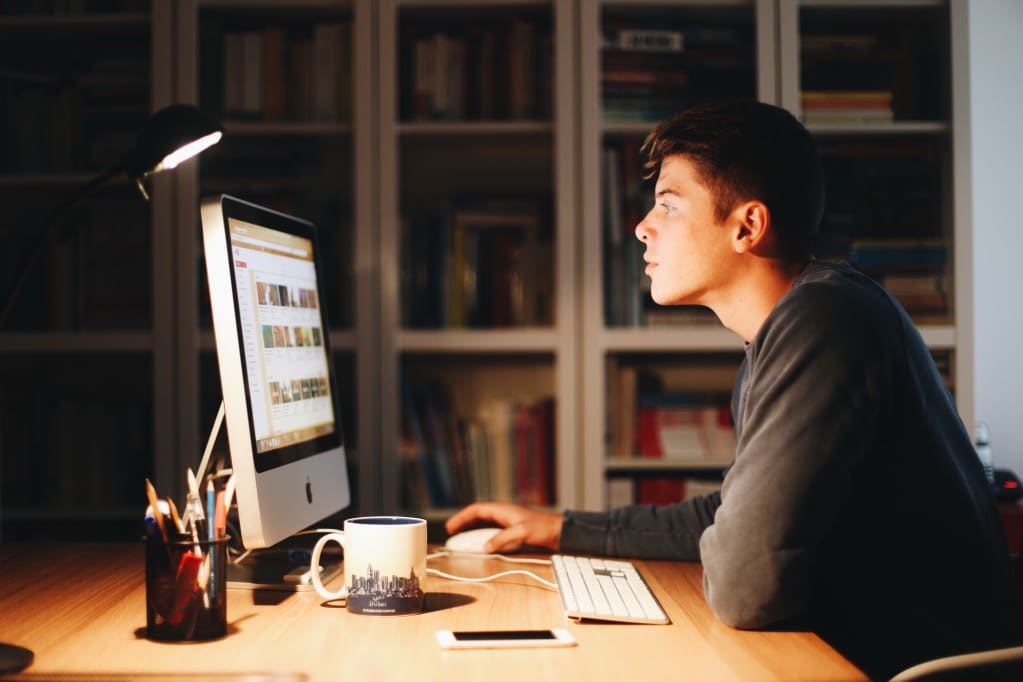


✨ Imagem carregada com sucesso: gkpb-banco-de-imagens-pagos.jpg ✨

Agora, escolha a ação que deseja realizar:
1. Translação da imagem
2. Rotação da imagem
3. Escalonamento da imagem

Digite o número correspondente à ação desejada (1, 2 ou 3): 2

🔄 Você escolheu realizar a rotação da imagem. Vamos começar!

Qual o ângulo de rotação deseja utilizar? 60


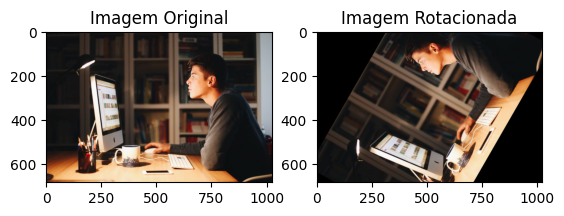

In [ ]:
# Apresentação do programa de manipulação de imagens

print("====================================================")
print("| Bem-vindo ao Programa de Manipulação de Imagens |")
print("====================================================")

print("\n🌟 Antes de começarmos, precisamos que você realize o upload da imagem desejada. 🌟")
print("Certifique-se de selecionar a imagem correta para garantir resultados precisos.")

# Simulação de upload de imagem
image_path_original = upload_image()
print(f"\n✨ Imagem carregada com sucesso: {image_path_original} ✨")

print("\nAgora, escolha a ação que deseja realizar:")
print("1. Translação da imagem")
print("2. Rotação da imagem")
print("3. Escalonamento da imagem")

# Simulação de escolha da ação
chosen_action = input("\nDigite o número correspondente à ação desejada (1, 2 ou 3): ")

# Mensagem personalizada com base na escolha
if chosen_action == "1":
    print("\n🚀 Você escolheu realizar a translação da imagem. Vamos começar!")
elif chosen_action == "2":
    print("\n🔄 Você escolheu realizar a rotação da imagem. Vamos começar!")
elif chosen_action == "3":
    print("\n🔍 Você escolheu realizar o escalonamento da imagem. Vamos começar!")
else:
    print("\n❌ Opção inválida. Por favor, escolha uma opção válida.")

# Aqui você chamaria as funções de manipulação de imagem que já foram criadas com base na escolha do usuário.
if chosen_action == "1":
    distancia_x = int(input("\nQual a distância do eixo x deseja utilizar na translação? "))
    distancia_y = int(input("\nQual a distância do eixo y deseja utilizar na translação? "))

    imagem_transladada, image_path = translacao_imagem(image_path_original, distancia_x, distancia_y)

    # Exibe a imagem original e a imagem transladada lado a lado
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)), plt.title('Transladada')
    plt.show()

elif chosen_action == "2":
    rotated_angle = int(input("\nQual o ângulo de rotação deseja utilizar? "))
    rotated_image, image_path = rotate_image(image_path_original, rotated_angle )

    # Exibe a imagem original e a imagem rotacionada lado a lado
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path_original), cv2.COLOR_BGR2RGB))
    plt.title("Imagem Original")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Rotacionada")
    plt.show()

elif chosen_action == "3":
    escala_percentual = int(input("\nQual a escala desejada (exemplo: 50 significa 50% do tamanho original)? "))
    imagem_resultante, path = escalonar_imagem(image_path_original, escala_percentual)
